# Explore here

In [ ]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf


import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


2. Construye y analiza la serie temporal
Construye la estructura de datos válida para la serie temporal, grafícala y, a continuación, analízala y responde a las siguientes preguntas:

¿Cuál es el tensor de la serie temporal?

¿Cuál es la tendencia?

¿Es estacionaria?

¿Existe variabilidad o presencia de ruido?

Nota: Un tensor en una serie temporal es la unidad de tiempo mínima para la cual hay datos. Puede ser cada segundo, minuto, hora, día, semana, mes...

In [ ]:
# Convertir la columna 'date' al formato datetime
df['date'] = pd.to_datetime(df['date'])


df.head()


,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [ ]:
# Establecer 'date' como índice
df.set_index('date', inplace=True)

# Crear la serie temporal
time_series = df['sales']


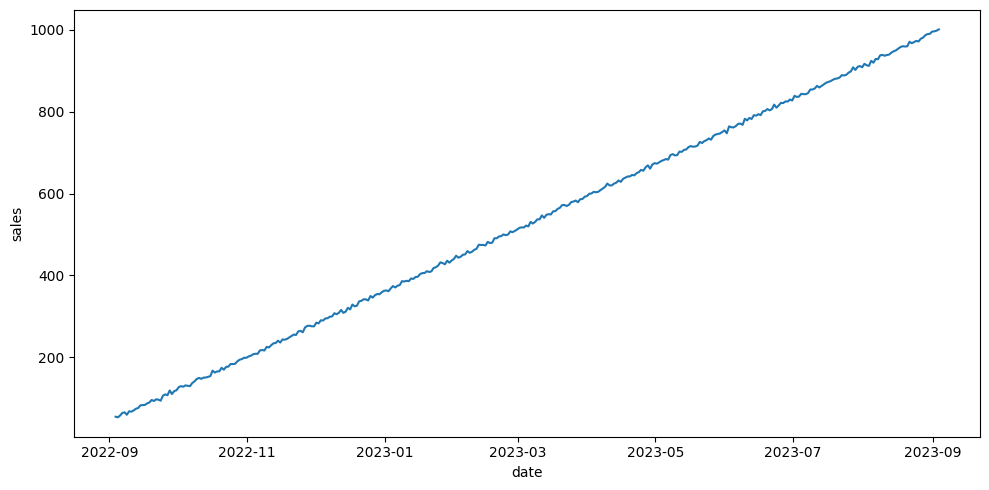

In [ ]:

# Visualizar la serie temporal
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = time_series)

plt.tight_layout()

plt.show()

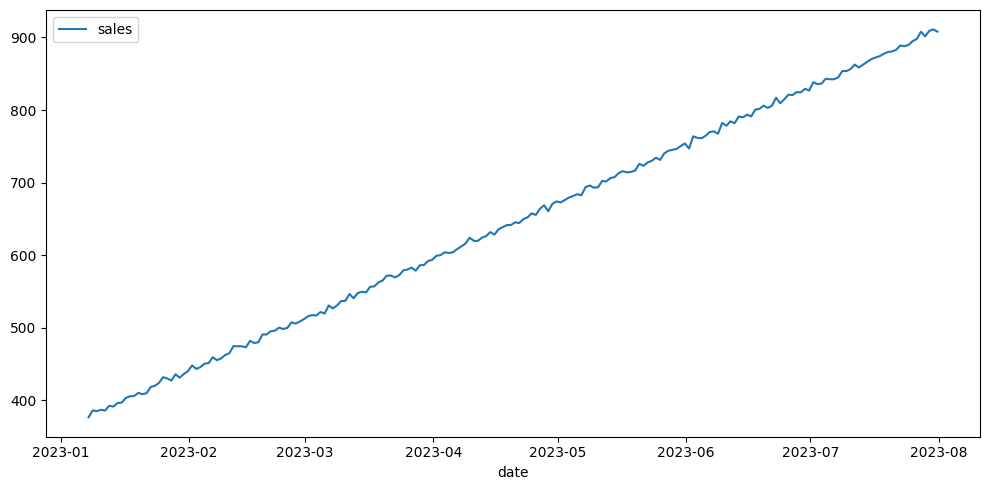

In [ ]:
# Filtrar solo los datos de julio de 2022
start_date = '01/07/2023'
end_date = '31/07/2023'
df_filtered = df[start_date:end_date]

# Visualizar la serie temporal de julio 2022
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df_filtered)

plt.tight_layout()

plt.show()

¿Cuál es el tensor de la serie temporal? R --->  por dia

¿Cuál es la tendencia? R ----> ascendente


Análisis de una serie temporal

Para la labor de realizar predicciones sobre series temporales y analizarlas, nos apoyaremos en la librería statsmodels.

La descomposición de una serie temporal es un proceso estadístico que separa de una serie de tiempo en varios elementos diferenciados.

Cada uno de estos componentes representa una parte de la estructura subyacente de la serie temporal.

Utilizamos la función seasonal_decompose de la biblioteca statsmodels para descomponer la serie de tiempo en sus componentes de tendencia, estacionalidad y residuos.

In [ ]:
# Analisis de una Serie temporal
decomposition = seasonal_decompose(time_series, period = 12)
decomposition

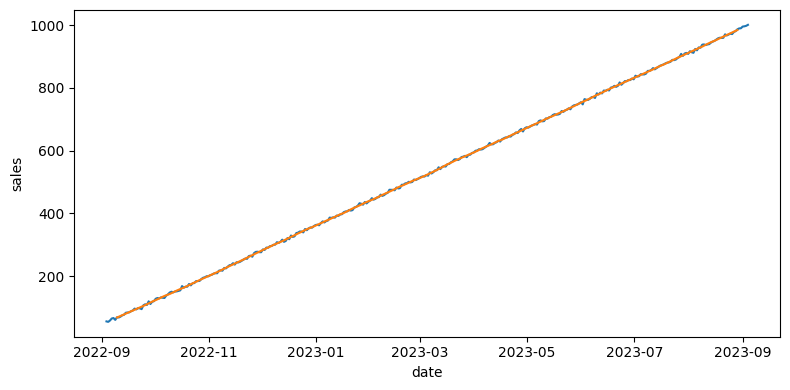

In [ ]:
# Análisis de la estacionalidad
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = time_series)
sns.lineplot(data = trend)

plt.tight_layout()

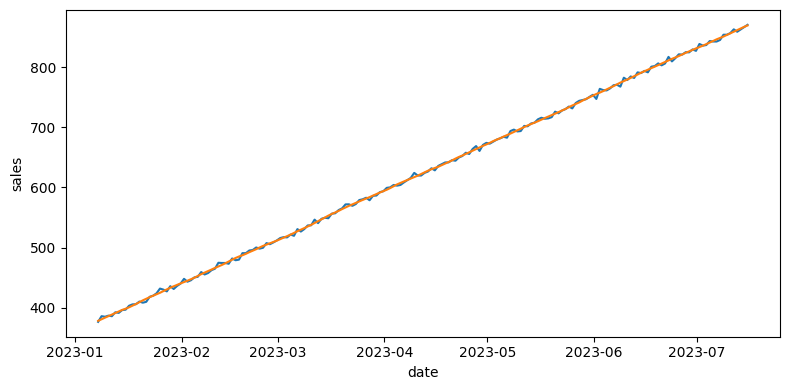

In [ ]:
# Filtrar solo los datos de julio de 2022
start_date = '01/07/2023'
end_date = '15/07/2023'
df_filtered = time_series[start_date:end_date]
df_filtered1 = trend[start_date:end_date]

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = df_filtered)
sns.lineplot(data = df_filtered1)

plt.tight_layout()

Para evaluar la estacionalidad de la serie temporal podemos aplicar la llamada Prueba de Dickey-Fuller (Dickey-Fuller test),
que es un contraste de hipótesis en el que la hipótesis nula es que la serie es estacionaria, y la alternativa, que es no estacionaria

In [ ]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

In [ ]:
test_stationarity(time_series)

Resultados de la prueba de Dickey-Fuller:


,0
Test Statistic,0.545414
p-value,0.986190
#Lags Used,13.000000
Number of Observations Used,352.000000
Critical Value (1%),-3.449065
Critical Value (5%),-2.869786
Critical Value (10%),-2.571163


¿Es estacionaria? R -----> no es estacionaria

Dado que el p-value es muy alto y el estadístico del test no supera los valores críticos negativos, puedes concluir que la serie temporal que has analizado no es estacionaria. Es posible que necesites diferenciar la serie (o aplicar transformaciones como logaritmos o tendencia) para hacerla estacionaria antes de realizar análisis adicionales.


Diferenciación : La diferenciación es la forma más común de hacer que una serie temporal sea estacionaria. Implica restar el valor actual del valor anterior, lo que elimina tendencias lineales.

In [ ]:

# Aplicar la primera diferenciación
df['sales_diff'] = df['sales'].diff()
time_series1 = df['sales_diff'].fillna(0) # Esto reemplaza NaN por 0

# Ahora, df se considera una serie temporal
print("DataFrame original con índice de fecha:\n", time_series1)

DataFrame original con índice de fecha:
 date
2022-09-03 17:10:08.079328    0.000000
2022-09-04 17:10:08.079328   -1.488946
2022-09-05 17:10:08.079328    4.338482
2022-09-06 17:10:08.079328    6.389205
2022-09-07 17:10:08.079328    1.482734
                                ...   
2023-08-30 17:10:08.079328    0.518681
2023-08-31 17:10:08.079328    5.386972
2023-09-01 17:10:08.079328    0.827090
2023-09-02 17:10:08.079328    1.535798
2023-09-03 17:10:08.079328    3.132571
Name: sales_diff, Length: 366, dtype: float64


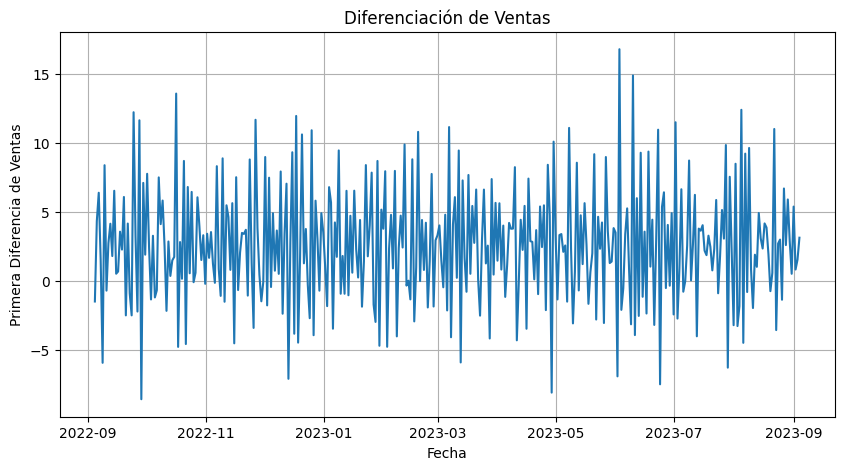

In [ ]:
# Graficar la serie diferenciada
plt.figure(figsize=(10, 5))
plt.plot(df['sales_diff'])
plt.title('Diferenciación de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Primera Diferencia de Ventas')
plt.grid(True)
plt.show()

In [ ]:

# Aplicar el test de Dickey-Fuller a la serie diferenciada
test_stationarity(time_series1)

Resultados de la prueba de Dickey-Fuller:


,0
Test Statistic,-9.393159e+00
p-value,6.479111e-16
#Lags Used,1.200000e+01
Number of Observations Used,3.530000e+02
Critical Value (1%),-3.449011e+00
Critical Value (5%),-2.869763e+00
Critical Value (10%),-2.571151e+00


Análisis de la variabilidad
La variabilidad implica el estudio de los residuos: que es cómo fluctúan los datos una vez se ha estudiado la tendencia y la estacionalidad.

Para acceder a su información recurrimos al componente resid del resultado decomposition.

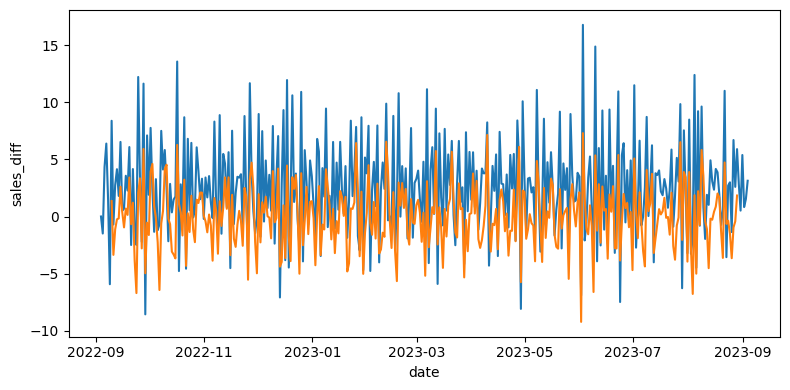

In [ ]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = time_series1)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

¿Existe variabilidad o presencia de ruido? R ----> la carga de residuos es baja, por lo tanto el comportamiento de los datos tiende a ser uniforme.

3. Entrena un ARIMA
Utiliza los datos de entrenamiento para encontrar la mejor parametrización de tu modelo ARIMA.

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.5 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima


In [ ]:
# Utilizar solo los datos originales para encontrar los parámetros
model = auto_arima(time_series1)

# Imprimir el resumen del modelo
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -920.316
Date:                Sat, 03 Aug 2024   AIC                           1848.632
Time:                        07:50:12   BIC                           1864.242
Sample:                    09-03-2022   HQIC                          1854.835
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8070      0.135     20.754      0.000       2.542       3.072
ar.L1         -0.0811      0.052     -1.553      0.120      -0.184       0.021
ma.L1         -0.9329      0.021    -44.302      0.0

In [ ]:

# Ajustar un modelo ARIMA a la serie
model_fit = model.fit(y=time_series1)  # Pass the time series data to the fit method



Predicción del modelo
Una vez se ha entrenado el modelo, se puede utilizar para predecir a futuro (predeciremos los siguientes 12 meses)

In [ ]:
# Ajustar un modelo ARIMA a la serie
model_fit = model.fit(y=time_series1)  # Pass the time series data to the fit method

# Generate forecast using the fitted model
forecast = model_fit.predict(n_periods=12)  # Use predict for forecasting
forecast

,0
2023-09-04 17:10:08.079328,1.707917
2023-09-05 17:10:08.079328,2.668406
2023-09-06 17:10:08.079328,2.590480
2023-09-07 17:10:08.079328,2.596803
2023-09-08 17:10:08.079328,2.596290
2023-09-09 17:10:08.079328,2.596331
2023-09-10 17:10:08.079328,2.596328
2023-09-11 17:10:08.079328,2.596328
2023-09-12 17:10:08.079328,2.596328
2023-09-13 17:10:08.079328,2.596328


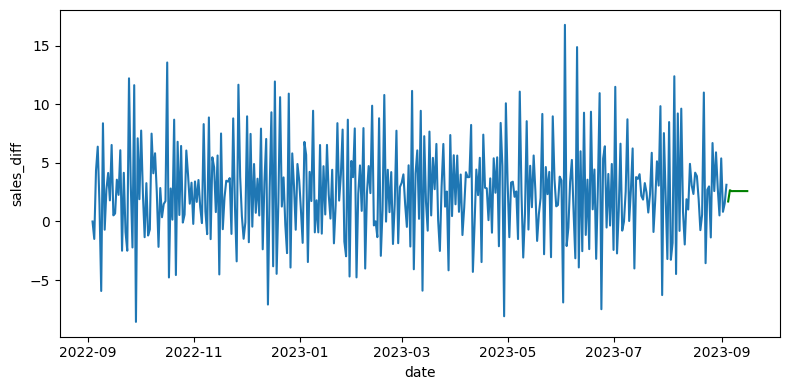

In [ ]:
fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = time_series1)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()